In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import numpy as np
import pyVIA.core as via
import warnings
import pickle
warnings.filterwarnings('ignore')

/Users/kilpinen/opt/anaconda3/envs/ViaEnv/bin/lib/python3.7/site-packages/phate/__init__.py


In [ ]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

In [135]:
df = pd.read_csv('../NeuronalFeatureSpace/analysis/VIA.out.GABA.opt2.csv', sep=',')
print(df)

                       barcode  label     UMAP_1    UMAP_2     LSI_1  \
1     _di_0_GGGAACAGTCCACCAG-1     18  12.317809  6.648207 -2.801788   
2     _di_0_CCTTAATAGTAACTCC-1     18  10.557669  5.832421  0.695344   
3     _di_0_TACAGCAAGAACAGGA-1     60  14.451452  2.484849 -0.007030   
4     _di_0_ACTTTCATCTTATCAC-1     60  14.179856  2.719741 -0.399055   
5     _di_0_GACCCAGAGTTCCCGG-1     60  14.299984  2.765545  0.179887   
...                        ...    ...        ...       ...       ...   
3517  _mb_2_GACCCAGGTATATGGA-1    116  -7.946249  3.258793  0.699596   
3518  _mb_2_AACTTGGAGGTACTCT-1     38  -3.638917 -5.174778  0.576143   
3519  _mb_2_CAACGGCAGTGTCGGA-1    116  -8.187266  3.137095  0.630078   
3520  _mb_2_TTGTTGTAGGCGTAGT-1     94  -9.125630  3.070040  1.164246   
3521  _mb_2_GCTGTTCCATGGTATC-1    115   1.534759 -3.042325 -0.099845   

         LSI_2     LSI_3     LSI_4     LSI_5     LSI_6  ...        Th  \
1    -0.600388  0.611238  1.747505  1.073346  1.829993  ...  0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


number cells 3521


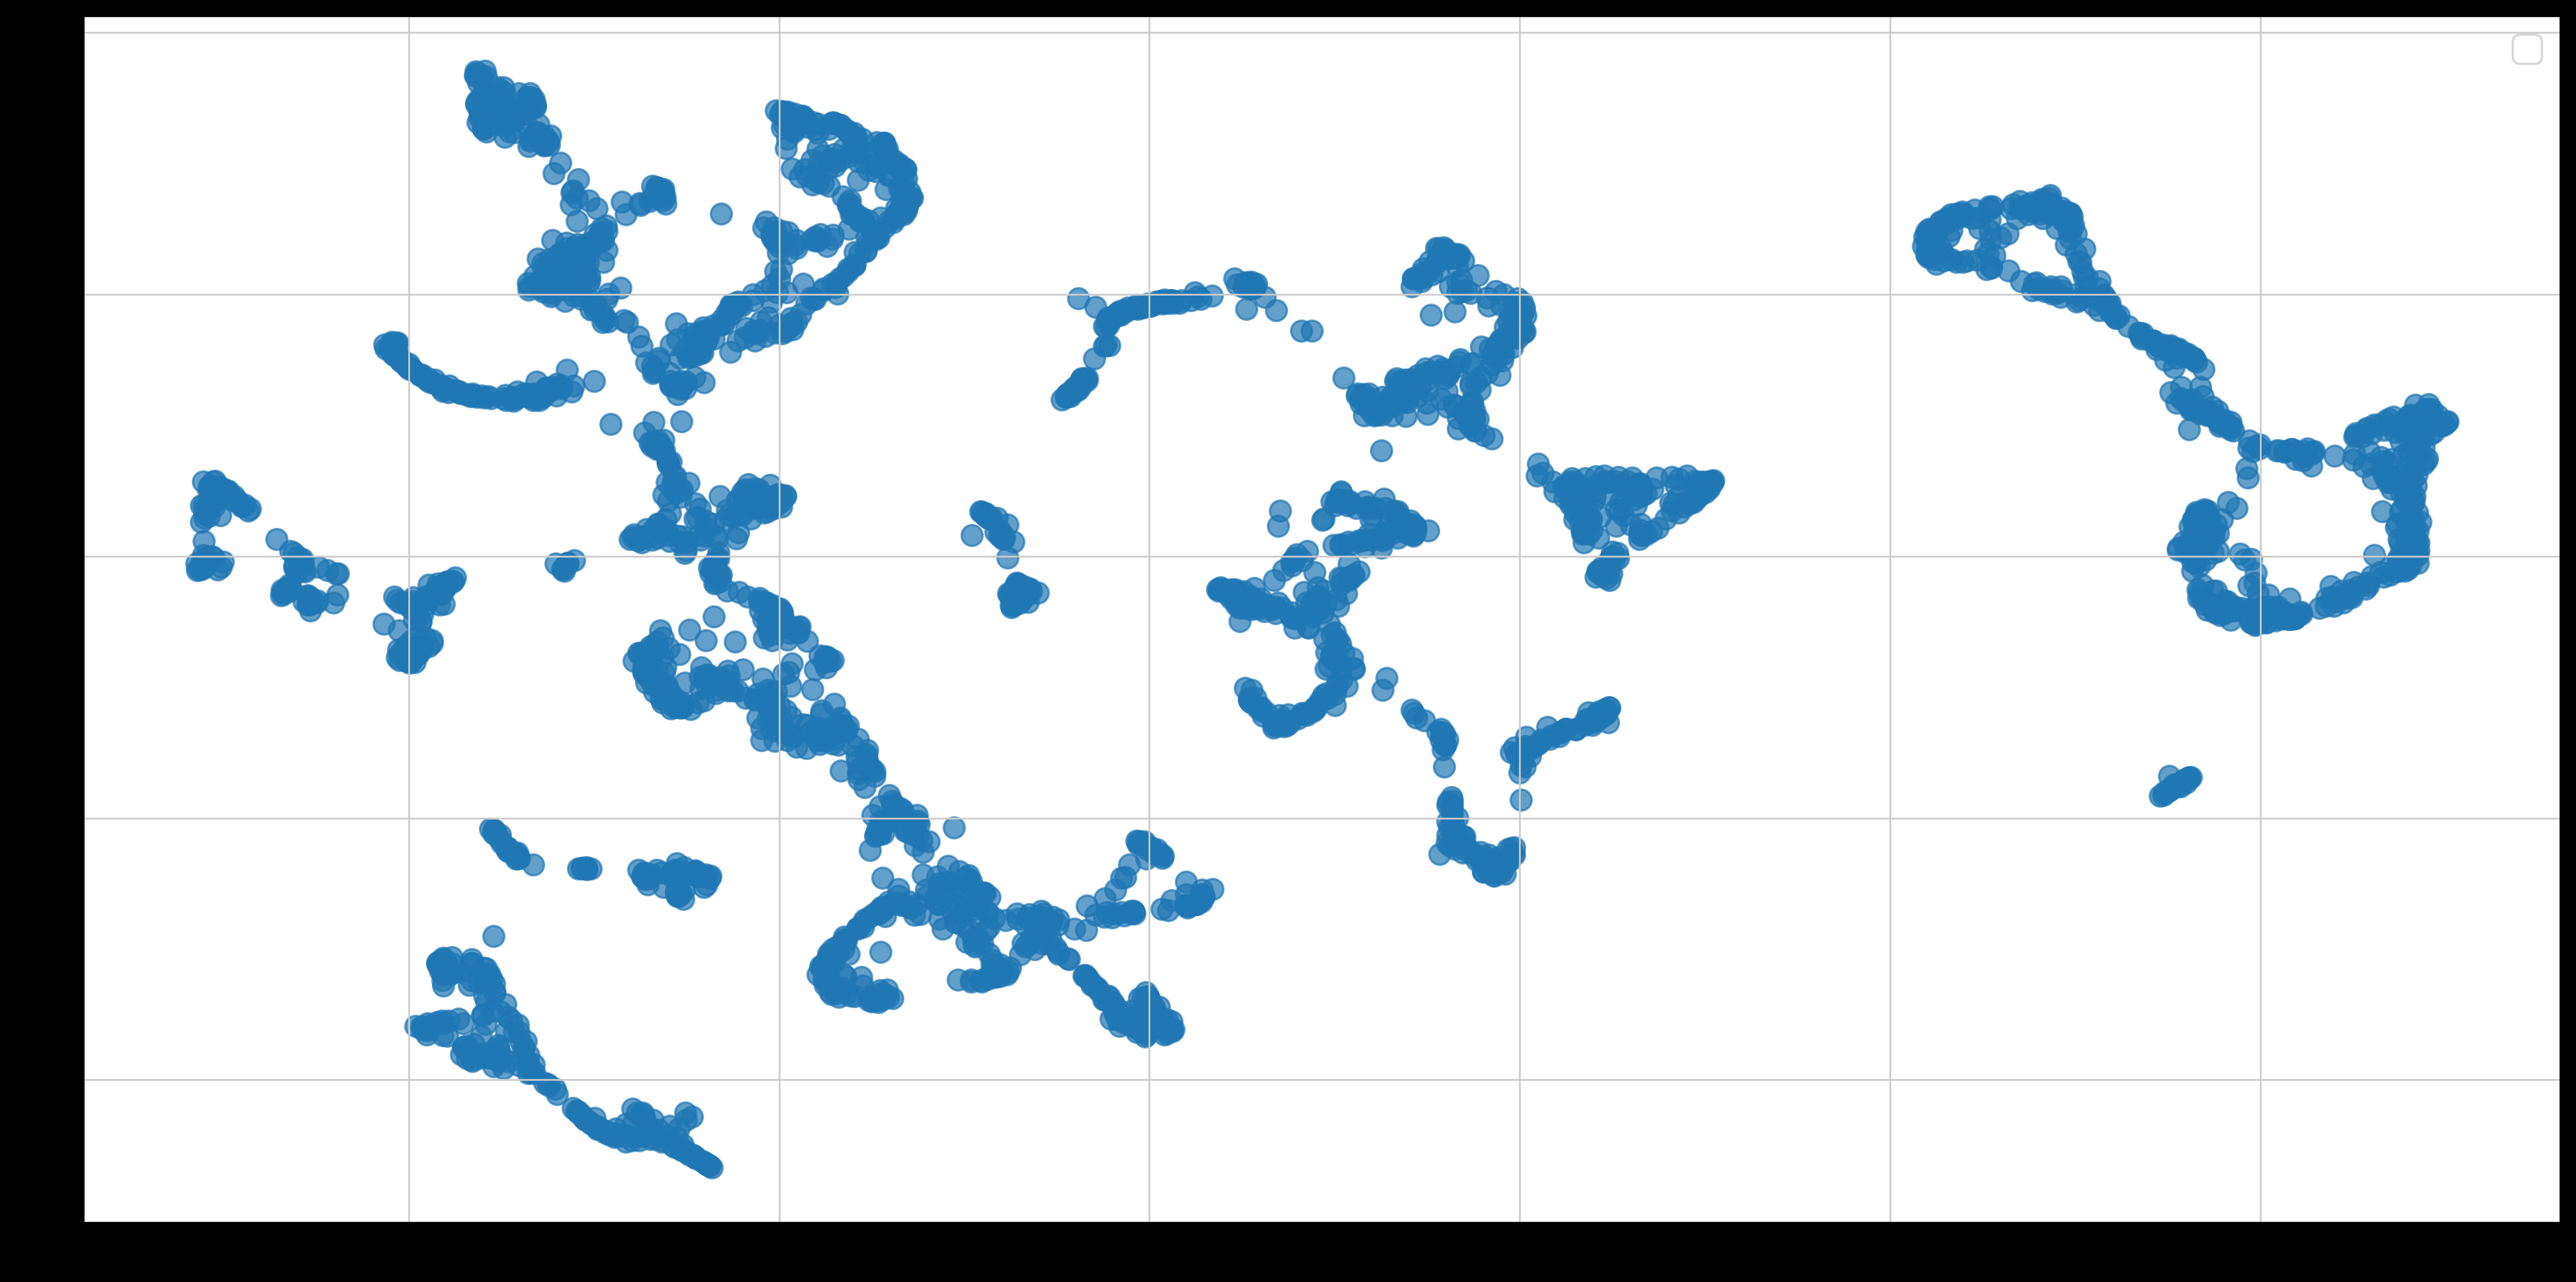

In [136]:
print('number cells', df.shape[0])

SVDcol = ["LSI_" + str(a) for a in range(2,60)]

UMAPcol = ["UMAP_1","UMAP_2"]
embedding = np.array(df[UMAPcol])

fig, ax = plt.subplots(figsize=[20,10])
ax.scatter(embedding[:,0], embedding[:,1], alpha=0.7, s=90)

plt.legend(fontsize='large', markerscale=1.3)
plt.show()

In [367]:
# Rerun point

# Setting VIA parameters
knn = 32
random_seed = 42
v0_too_big_factor=0.65
v1_too_big_factor=0.15

jac_std_global=0.55
dist_std_local=0.1
cluster_graph_pruning_std=0.15
pseudotime_threshold_TS=45

alpha_teleport = 0.98

num_sim_branch_probability = 1000

root, dataset =  ['21','90'], 'group'

In [368]:
numeric_labels=df['label'].values.tolist()
character_labels = [str(g) for g in numeric_labels]

In [369]:
# Running VIA coarse
X_in = df[SVDcol].values

v0 = via.VIA(X_in, true_label=character_labels, jac_std_global=jac_std_global, cluster_graph_pruning_std=cluster_graph_pruning_std, knn=knn, dist_std_local=dist_std_local, num_mcmc_simulations=num_sim_branch_probability,  
         too_big_factor=v0_too_big_factor,pseudotime_threshold_TS=pseudotime_threshold_TS,root_user=root, alpha_teleport = alpha_teleport, dataset=dataset, random_seed=random_seed,is_coarse=True, preserve_disconnected_after_pruning=True, edgebundle_pruning_twice = True) 
v0.run_VIA()

2022-11-30 14:23:04.458683	Running VIA over input data of 3521 (samples) x 58 (features)
2022-11-30 14:23:04.458836	Knngraph has 32 neighbors
2022-11-30 14:23:05.986878	Finished global pruning of 32-knn graph used for clustering. Kept 67.5 % of edges. 
2022-11-30 14:23:06.008512	Number of connected components used for clustergraph  is 1
2022-11-30 14:23:06.171079	The number of components in the original full graph is 1
2022-11-30 14:23:06.171118	For downstream visualization purposes we are also constructing a low knn-graph 
2022-11-30 14:23:11.707817	Commencing community detection
2022-11-30 14:23:11.749661	Finished running Leiden algorithm. Found 207 clusters.
2022-11-30 14:23:11.751051	Merging 136 very small clusters (<10)
2022-11-30 14:23:11.755765	Finished detecting communities. Found 71 communities
2022-11-30 14:23:11.756151	Making cluster graph. Global cluster graph pruning level: 0.15
2022-11-30 14:23:11.774454	Graph has 1 connected components before pruning
2022-11-30 14:23:11.

(<Figure size 2250x2250 with 74 Axes>,
 <AxesSubplot:title={'center':'Cluster Composition. K=32. ncomp = 58'}>,
 <AxesSubplot:title={'center':'Pseudotime'}>)

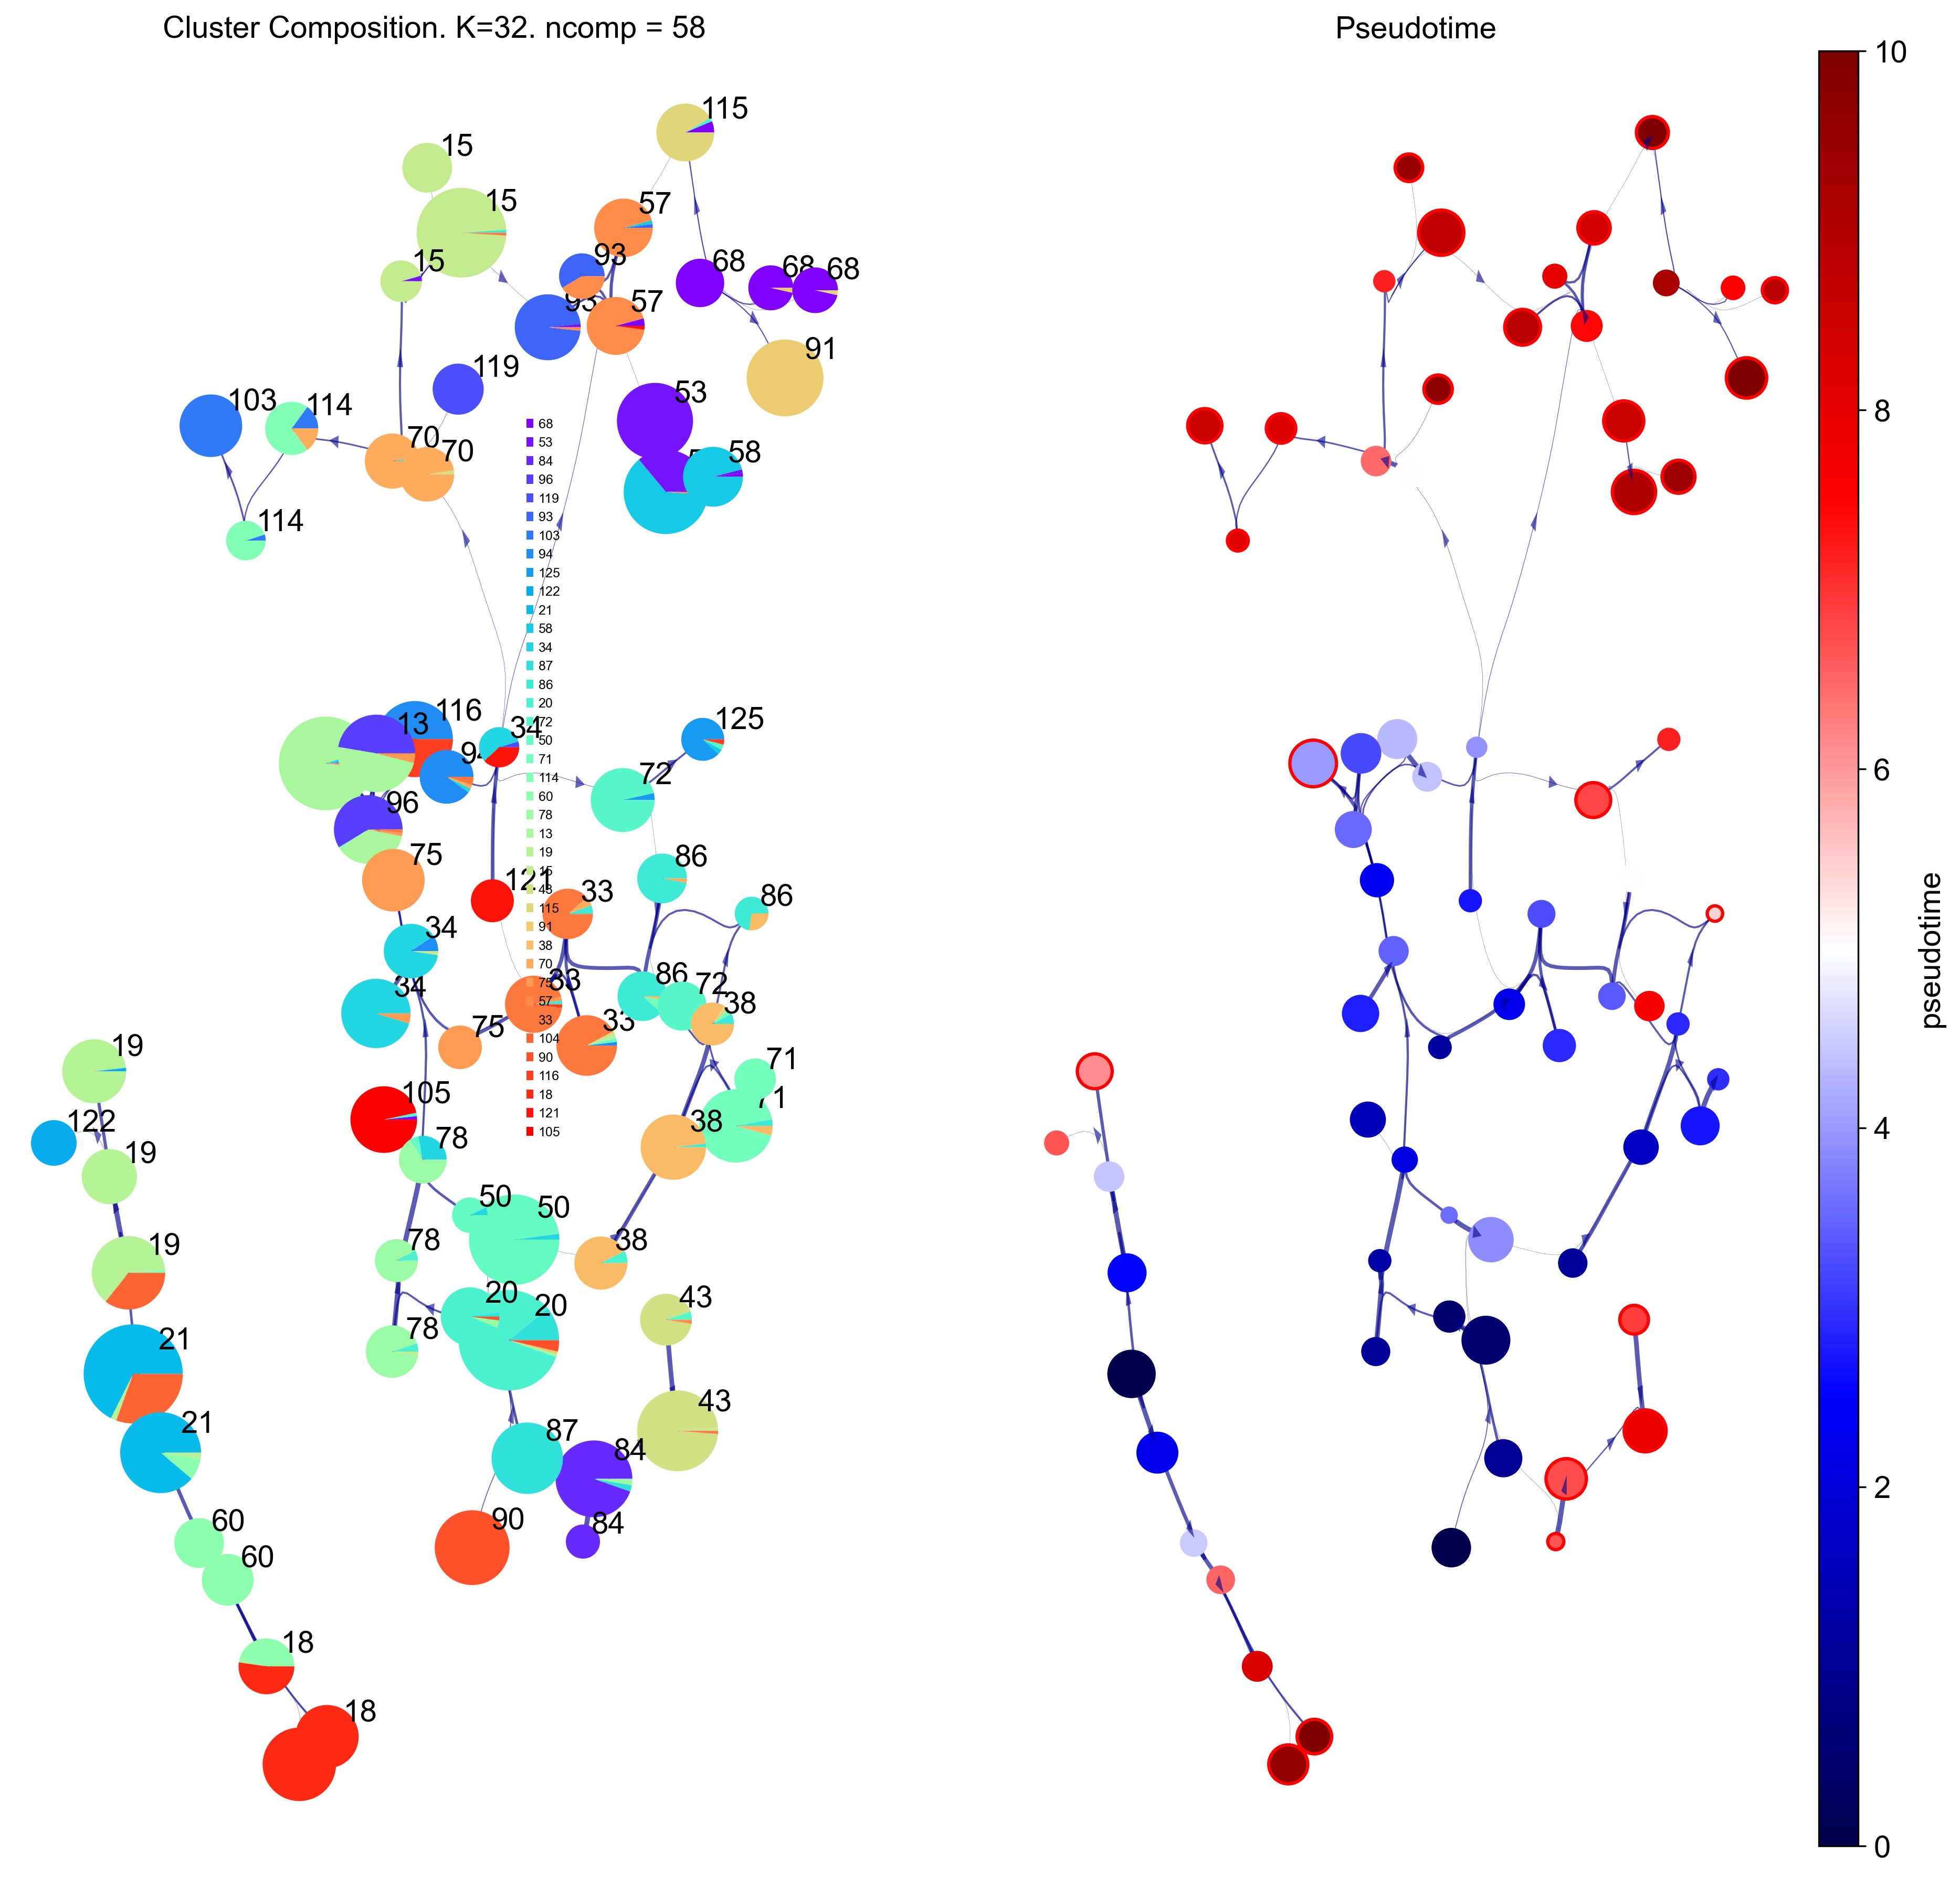

In [370]:
plt.rcParams["figure.figsize"]=15,15
via.draw_piechart_graph(v0,type_data='pt', title='E14 GABA', cmap='seismic', ax_text=False)

In [ ]:
save_object(v0, 'v0.pkl')

(<Figure size 3600x3600 with 1 Axes>,
 <AxesSubplot:title={'center':'Streamplot'}>)

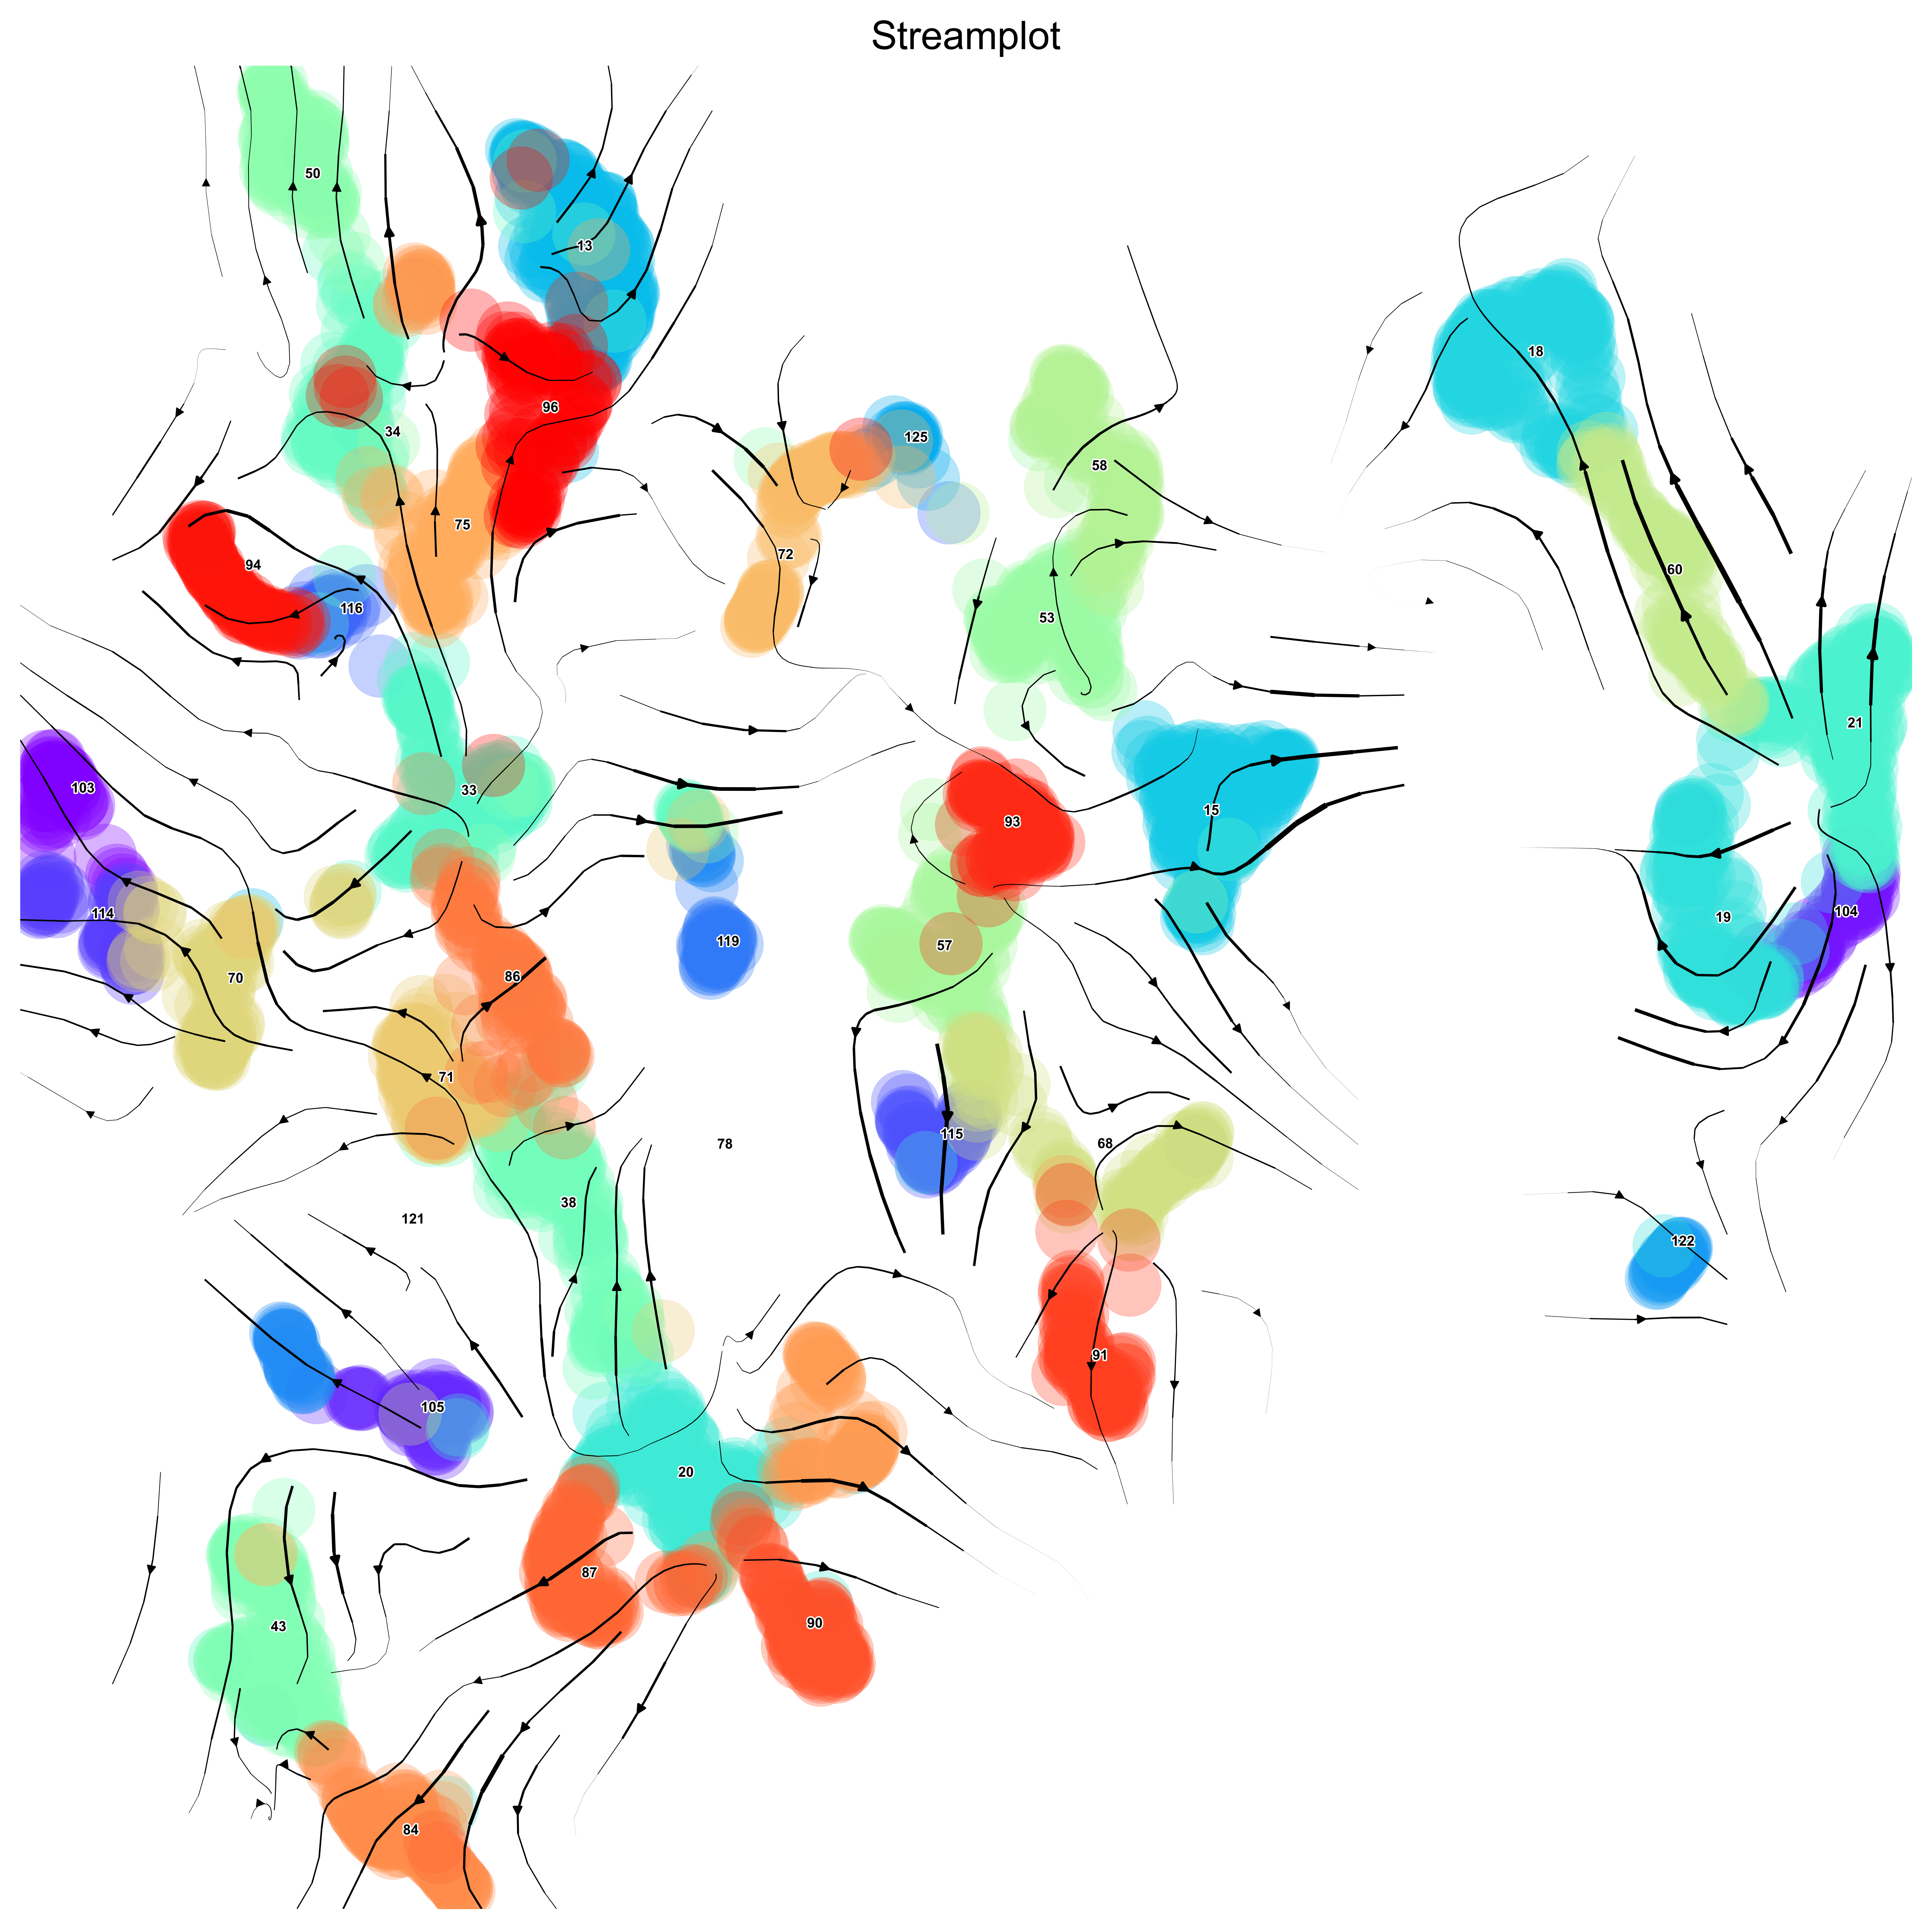

In [364]:
#draw a field plot of cell level directionality on umap
plt.rcParams["figure.figsize"]=12,12
via.via_streamplot(via_coarse=v0, embedding=embedding, scatter_size=500, scatter_alpha=0.3, smooth_transition=3, linewidth=1.2, density_stream=1.4)

In [371]:
plt.rcParams["figure.figsize"]=20,20
v1 = via.VIA(X_in, true_label=character_labels, jac_std_global=jac_std_global, dist_std_local=dist_std_local, knn=knn,
         too_big_factor=v1_too_big_factor, root_user=root, cluster_graph_pruning_std=cluster_graph_pruning_std, is_coarse=False,num_mcmc_simulations=num_sim_branch_probability,
         preserve_disconnected_after_pruning=True,pseudotime_threshold_TS=pseudotime_threshold_TS, alpha_teleport = alpha_teleport, dataset=dataset, random_seed=random_seed,via_coarse = v0, edgebundle_pruning_twice = True)
v1.run_VIA()

2022-11-30 14:23:38.257789	Running VIA over input data of 3521 (samples) x 58 (features)
2022-11-30 14:23:38.257927	Knngraph has 32 neighbors
2022-11-30 14:23:39.068547	Finished global pruning of 32-knn graph used for clustering. Kept 67.5 % of edges. 
2022-11-30 14:23:39.068804	Commencing community detection
2022-11-30 14:23:39.107471	Finished running Leiden algorithm. Found 207 clusters.
2022-11-30 14:23:39.108377	Merging 136 very small clusters (<10)
2022-11-30 14:23:39.110361	Finished detecting communities. Found 71 communities
2022-11-30 14:23:39.110551	Making cluster graph. Global cluster graph pruning level: 0.15
2022-11-30 14:23:39.121792	Graph has 1 connected components before pruning
2022-11-30 14:23:39.125032	Graph has 1 connected components before pruning
2022-11-30 14:23:39.125495	Graph has 2 connected components after reconnecting
2022-11-30 14:23:39.125640	8.4% links trimmed from local pruning relative to start
2022-11-30 14:23:39.125656	82.5% links trimmed from global p

(<Figure size 3000x3000 with 74 Axes>,
 <AxesSubplot:title={'center':'Cluster Composition. K=32. ncomp = 58'}>,
 <AxesSubplot:title={'center':'Pseudotime'}>)

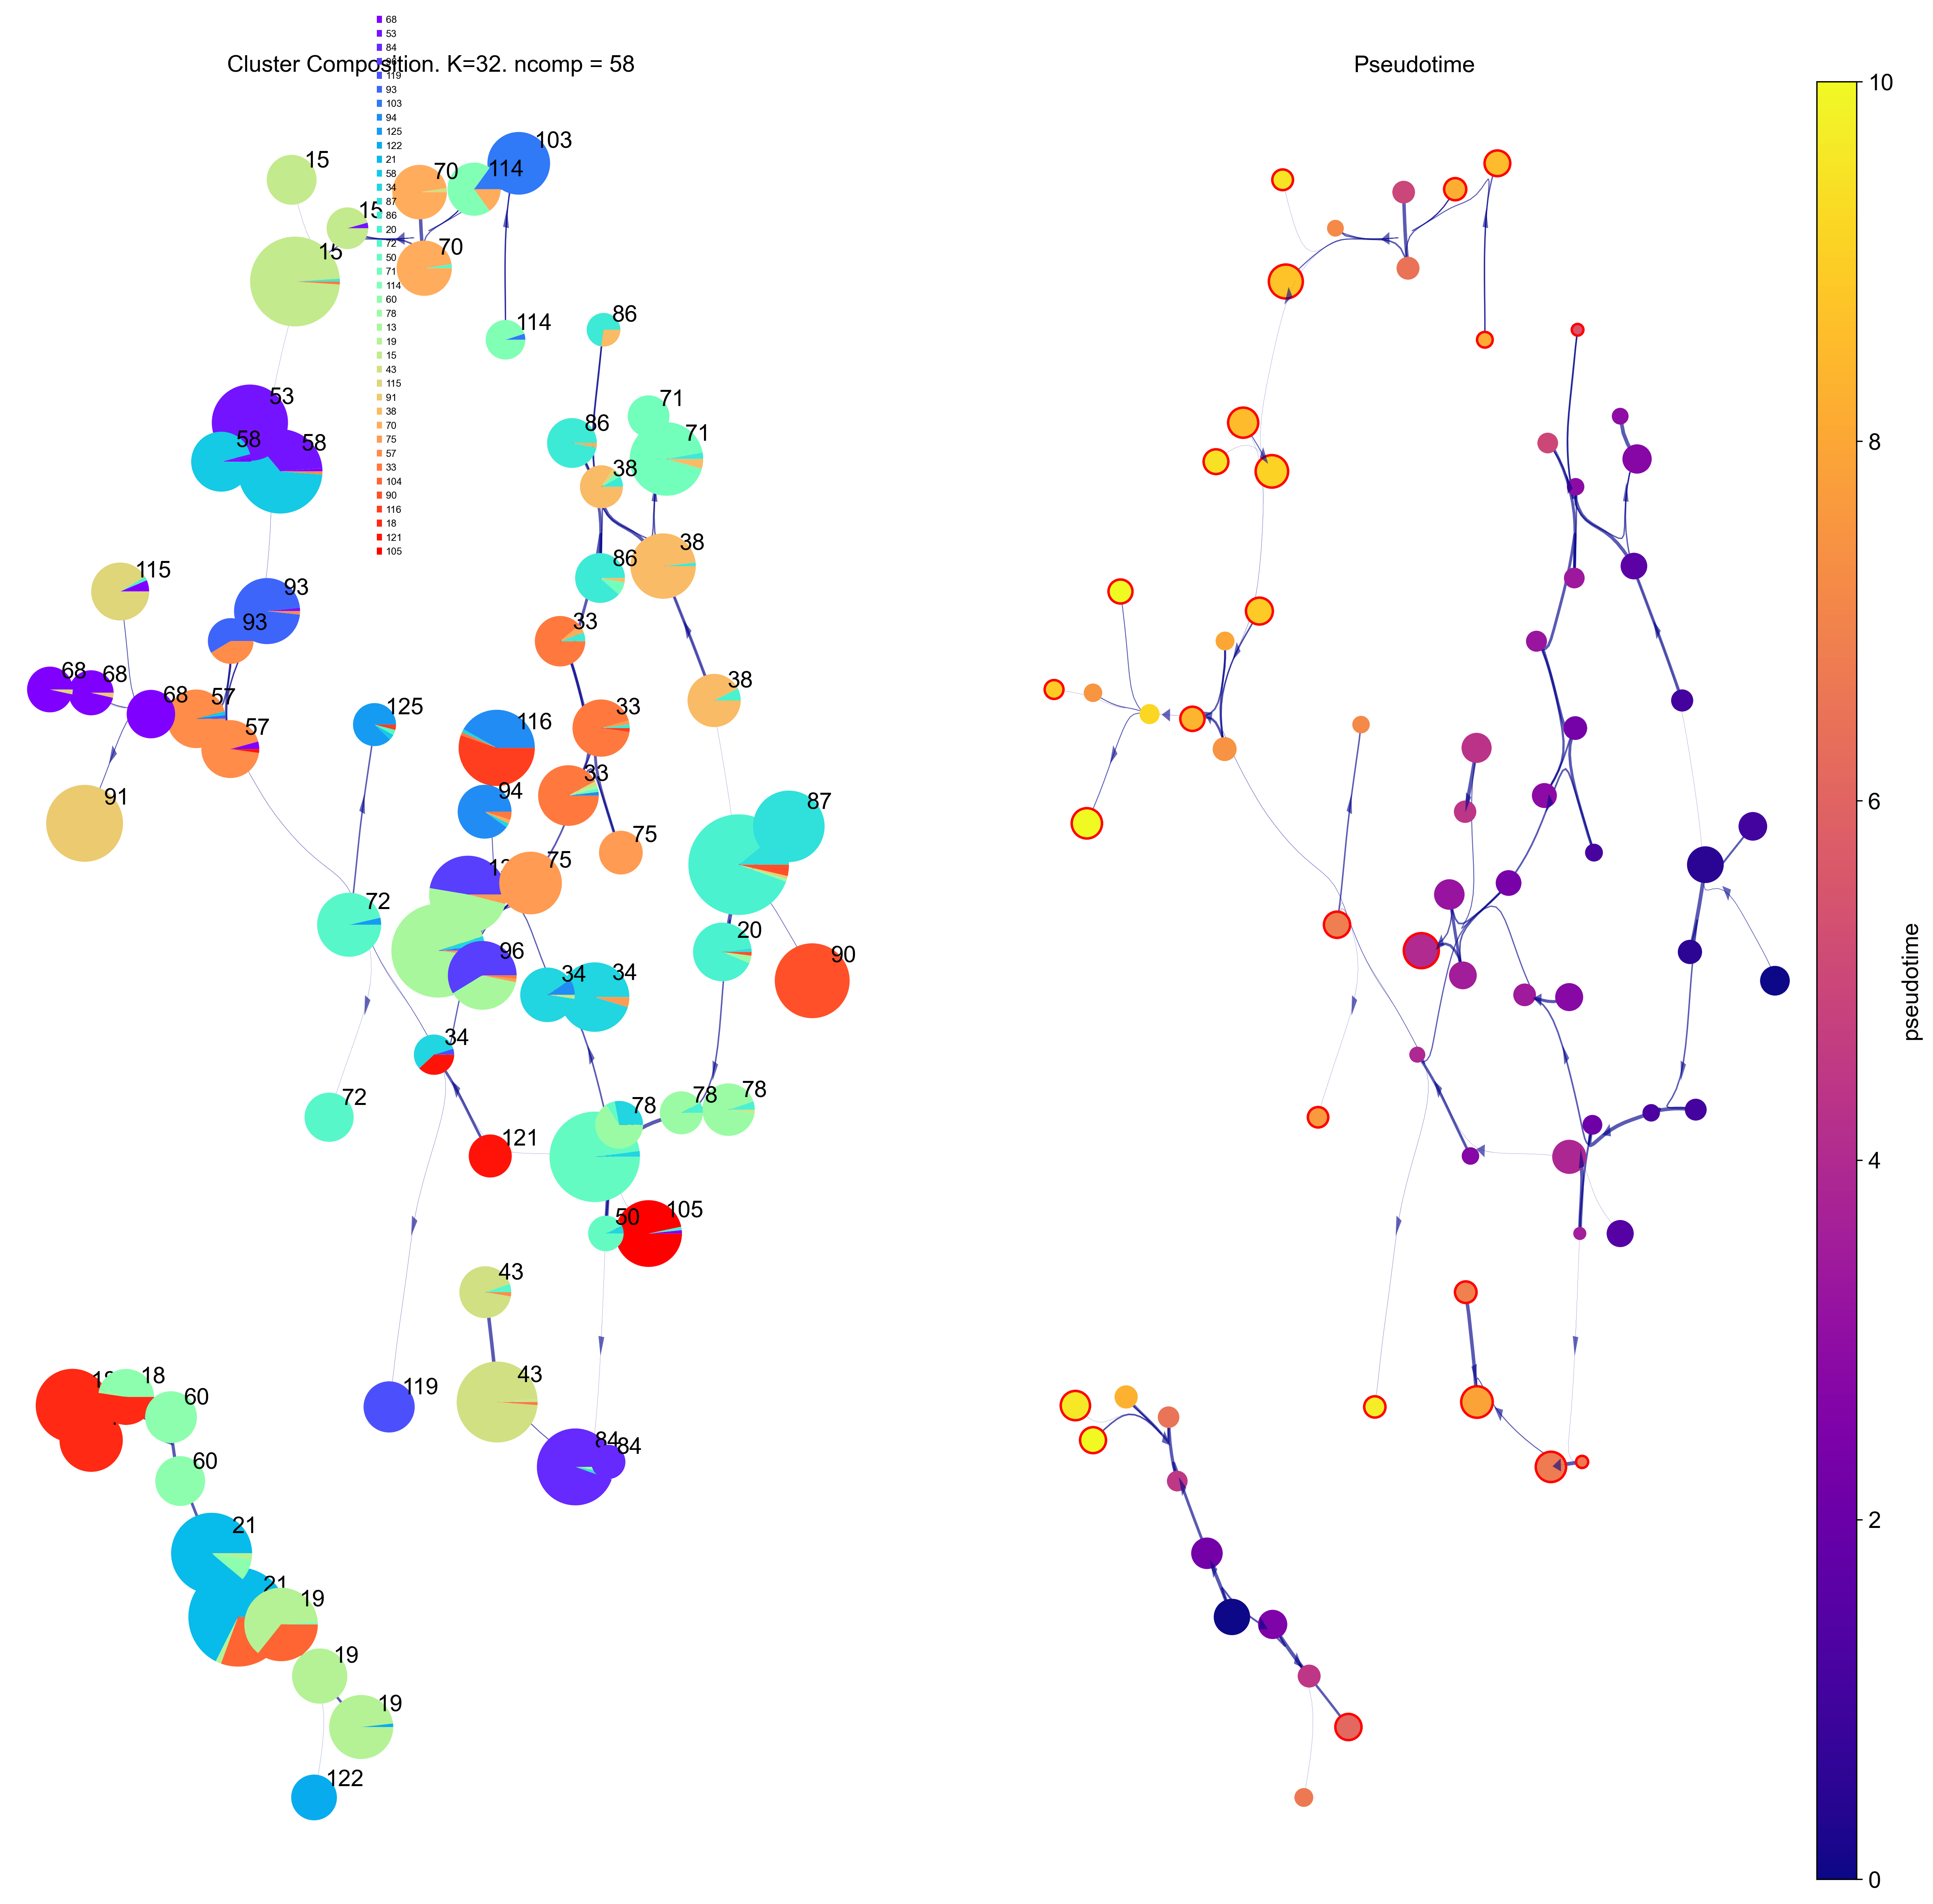

In [408]:
plt.rcParams["figure.figsize"]=20,20
plt.rcParams['legend.loc'] = "upper left"
via.draw_piechart_graph(v1,type_data='pt', ax_text=False)

In [377]:
save_object(v1, 'v1.pkl')